# **WISE Customer Churn Analysis (Last 5 years)**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your Excel file
df = pd.read_excel("/content/Sample_Data _Growth_Analytics.xlsx", sheet_name="Sample Data", parse_dates=["Transaction_Date"], engine='openpyxl') # or engine='xlrd'

# Define max date and 5-year cutoff
max_date = df['Transaction_Date'].max()
cutoff_date = max_date - pd.DateOffset(years=5)

# Group by customer to calculate summary
customer_summary = df.groupby('Customer_ID').agg(
    First_Transaction=('Transaction_Date', 'min'),
    Last_Transaction=('Transaction_Date', 'max'),
    Num_Transactions=('Transaction_Date', 'count'),
    Total_Amount=('Amount', 'sum'),
    Avg_Amount_per_Transaction=('Amount', 'mean'),
    Industry=('Industry', 'first')
).reset_index()

# Filter to customers with activity in the last 5 years
customer_summary = customer_summary[customer_summary['Last_Transaction'] >= cutoff_date]

# Define churn: no activity in last 90 days
churn_threshold = max_date - pd.Timedelta(days=90)
customer_summary['Churned'] = customer_summary['Last_Transaction'] < churn_threshold

# Display the final summary
print(customer_summary[['Customer_ID', 'First_Transaction', 'Last_Transaction',
                        'Num_Transactions', 'Total_Amount', 'Avg_Amount_per_Transaction', 'Industry', 'Churned']].head())

      Customer_ID First_Transaction Last_Transaction  Num_Transactions  \
0      Customer_1        2020-02-27       2021-06-28                88   
1     Customer_10        2020-03-03       2020-06-28                70   
2    Customer_100        2020-02-07       2021-11-04                46   
3   Customer_1000        2020-01-13       2020-10-16                55   
4  Customer_10000        2020-03-11       2020-07-15                16   

   Total_Amount  Avg_Amount_per_Transaction    Industry  Churned  
0     64282.320                  730.480909     Finance     True  
1     29728.470                  424.692429       Other     True  
2     22849.570                  496.729783       Other     True  
3     29440.970                  535.290364      Retail     True  
4     12443.916                  777.744750  Healthcare     True  


In [2]:
# Keep only customers active within the last 5 years
recent_customers = customer_summary[customer_summary['Last_Transaction'] >= cutoff_date].copy()

# Define churn (no activity in last 90 days)
churn_threshold = max_date - pd.Timedelta(days=90)
recent_customers['Churned'] = recent_customers['Last_Transaction'] < churn_threshold

# Calculate churn rate
overall_churn_rate = recent_customers['Churned'].mean()

# Display result
print(f"Overall Churn Rate (last 5 years): {overall_churn_rate:.2%}")

Overall Churn Rate (last 5 years): 93.53%


In [3]:
# Calculate Customer Lifetime (in days)
recent_customers['Customer_Lifetime_Days'] = (
    recent_customers['Last_Transaction'] - recent_customers['First_Transaction']
).dt.days

# Metrics
avg_lifetime = recent_customers['Customer_Lifetime_Days'].mean()
median_lifetime = recent_customers['Customer_Lifetime_Days'].median()
max_lifetime = recent_customers['Customer_Lifetime_Days'].max()

avg_transactions = recent_customers['Num_Transactions'].mean()
avg_ltv = recent_customers['Total_Amount'].mean()

# Output
print("Key Customer Metrics (Last 5 Years)")
print(f"Average Customer Lifetime: {avg_lifetime:.1f} days")
print(f"Median Customer Lifetime: {median_lifetime} days")
print(f"Max Customer Lifetime: {max_lifetime} days")
print(f"Avg. Transactions per Customer: {avg_transactions:.2f}")
print(f"Avg. Lifetime Value (LTV): £{avg_ltv:.2f}")

# Count churned vs retained
customer_count_summary = (
    recent_customers['Churned']
    .value_counts()
    .rename(index={False: 'Retained', True: 'Churned'})
    .reset_index()
    .rename(columns={'index': 'Status', 'Churned': 'Customer_Count'})
)

# Print the result
print("Customer Count by Churn Status (Last 5 Years):")
print(customer_count_summary)

Key Customer Metrics (Last 5 Years)
Average Customer Lifetime: 397.7 days
Median Customer Lifetime: 395.0 days
Max Customer Lifetime: 1074 days
Avg. Transactions per Customer: 53.46
Avg. Lifetime Value (LTV): £29466.08
Customer Count by Churn Status (Last 5 Years):
  Customer_Count  count
0        Churned   8795
1       Retained    608


In [4]:
recent_customers

,Customer_ID,First_Transaction,Last_Transaction,Num_Transactions,Total_Amount,Avg_Amount_per_Transaction,Industry,Churned,Customer_Lifetime_Days
0,Customer_1,2020-02-27,2021-06-28,88,64282.320,730.480909,Finance,True,487
1,Customer_10,2020-03-03,2020-06-28,70,29728.470,424.692429,Other,True,117
2,Customer_100,2020-02-07,2021-11-04,46,22849.570,496.729783,Other,True,636
3,Customer_1000,2020-01-13,2020-10-16,55,29440.970,535.290364,Retail,True,277
4,Customer_10000,2020-03-11,2020-07-15,16,12443.916,777.744750,Healthcare,True,126
...,...,...,...,...,...,...,...,...,...
9480,Customer_9995,2020-01-04,2020-09-06,22,11515.512,523.432364,Healthcare,True,246
9481,Customer_9996,2021-06-26,2022-04-24,36,8232.525,228.681250,Manufacturing,True,302
9482,Customer_9997,2020-01-13,2021-12-04,46,32216.904,700.367478,Consulting,True,691
9483,Customer_9998,2020-03-29,2022-01-19,23,13224.684,574.986261,Healthcare,True,661


In [ ]:
recent_customers.to_excel('recent_customers.xlsx', index=False)
from google.colab import files
files.download('recent_customers.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Lifetime Distribution by Churn Status**

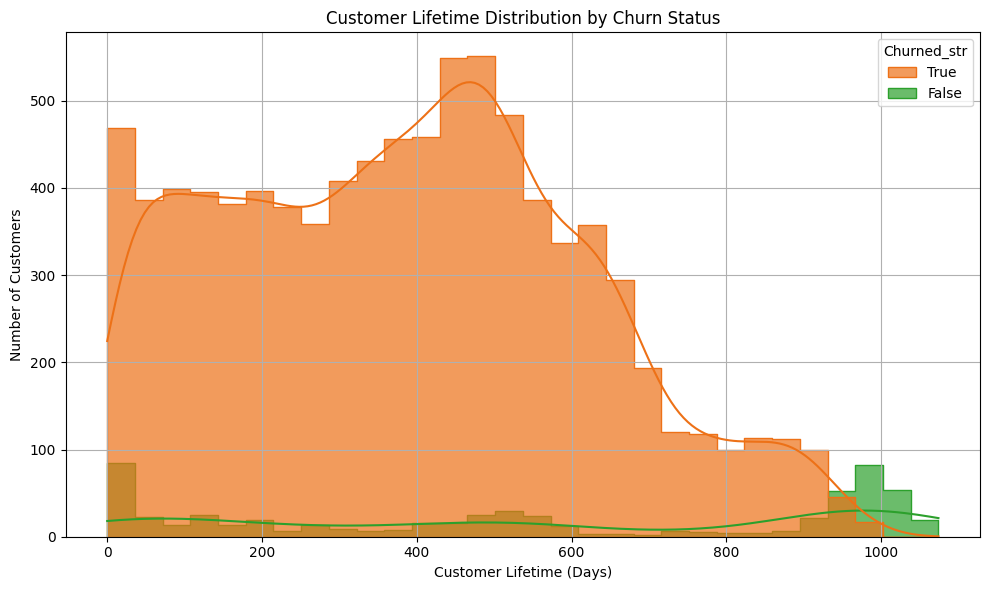


 Customer Lifetime Summary by Churn Status:

 Churned  count       mean  median  max  min        std
Retained    608 558.577303   531.0 1074    0 386.350730
 Churned   8795 386.617624   389.0  992    0 231.602837


In [ ]:
# Churn flag
churn_threshold = max_date - pd.Timedelta(days=90)
recent_customers['Churned'] = recent_customers['Last_Transaction'] < churn_threshold
recent_customers['Churned_str'] = recent_customers['Churned'].astype(str)

# Customer lifetime (days)
recent_customers['Customer_Lifetime_Days'] = (
    recent_customers['Last_Transaction'] - recent_customers['First_Transaction']
).dt.days

# Plot: Lifetime distribution by churn status
plt.figure(figsize=(10, 6))
sns.histplot(
    data=recent_customers,
    x='Customer_Lifetime_Days',
    hue='Churned_str',
    palette={'True': '#ed7117', 'False': '#2ca02c'},
    bins=30,
    kde=True,
    element='step',
    alpha=0.7
)
plt.title("Customer Lifetime Distribution by Churn Status")
plt.xlabel("Customer Lifetime (Days)")
plt.ylabel("Number of Customers")
plt.grid(True)
plt.tight_layout()
plt.show()

# Add: Summary Table of Lifetime Stats
lifetime_summary = recent_customers.groupby('Churned')['Customer_Lifetime_Days'].agg(
    count='count',
    mean='mean',
    median='median',
    max='max',
    min='min',
    std='std'
).reset_index()

lifetime_summary['Churned'] = lifetime_summary['Churned'].map({False: 'Retained', True: 'Churned'})

print("\n Customer Lifetime Summary by Churn Status:\n")
print(lifetime_summary.to_string(index=False))

**Number of Transactions and Spend by Churn Status**

<ipython-input-12-2d5655253a78>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=recent_customers, x='Churned_str', y='Num_Transactions',


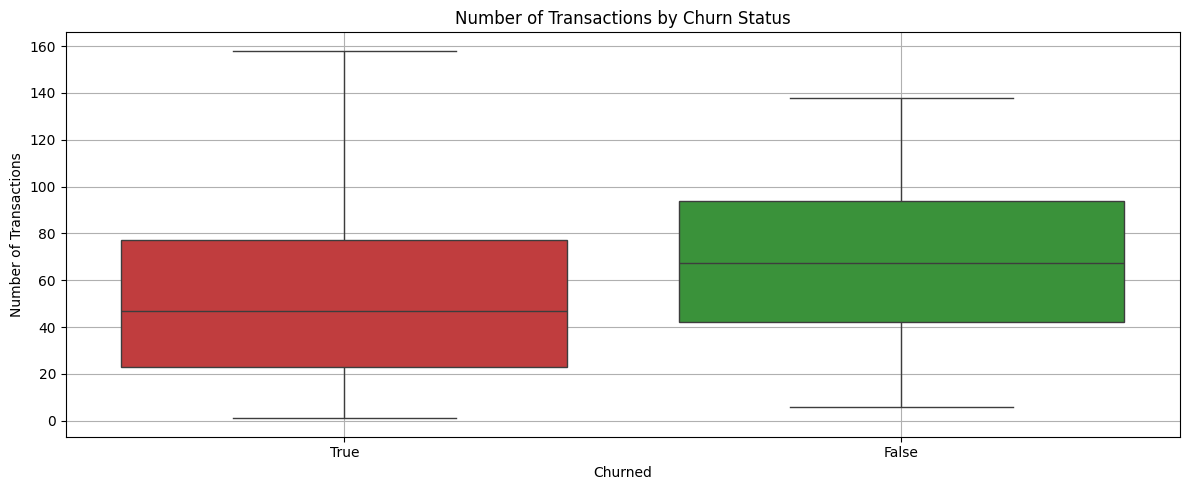

<ipython-input-12-2d5655253a78>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=recent_customers, x='Churned_str', y='Total_Amount',


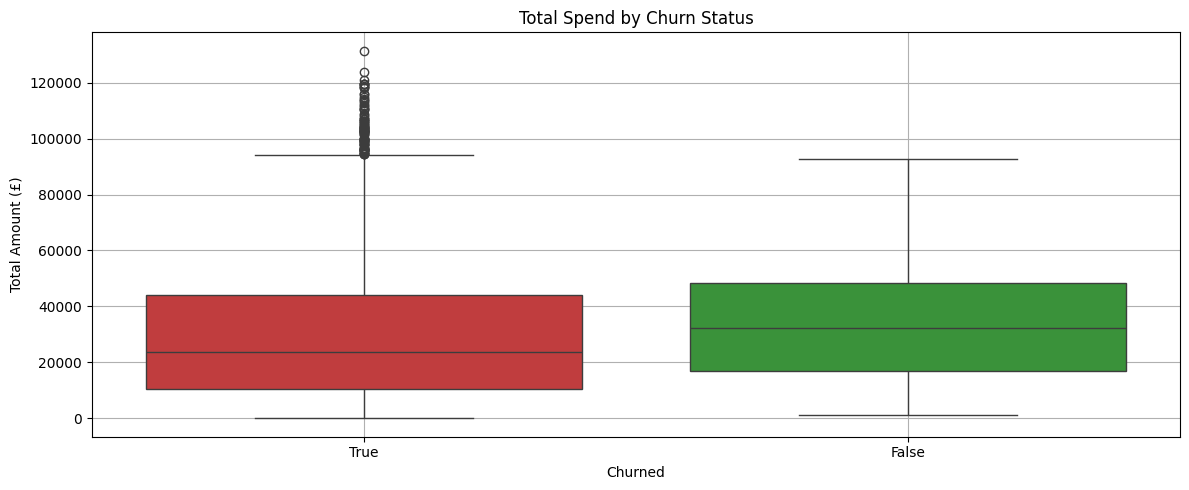

Summary Statistics by Churn Status:

         Num_Transactions                             Total_Amount             \
                     mean median  max min        std          mean     median   
Churned                                                                         
Retained        67.605263   67.5  138   6  32.375303  33883.573334  32132.065   
Churned         52.485048   47.0  158   1  34.726379  29160.702896  23729.310   

                                             
                 max      min           std  
Churned                                      
Retained   92588.249  1326.20  19730.365442  
Churned   131391.765     6.95  22477.842331  


In [ ]:
# Churn flag
churn_threshold = max_date - pd.Timedelta(days=90)
recent_customers['Churned'] = recent_customers['Last_Transaction'] < churn_threshold
recent_customers['Churned_str'] = recent_customers['Churned'].astype(str)

# Plot: Frequency vs Churn
plt.figure(figsize=(12, 5))
sns.boxplot(data=recent_customers, x='Churned_str', y='Num_Transactions',
            palette={'True': '#d62728', 'False': '#2ca02c'})
plt.title("Number of Transactions by Churn Status")
plt.xlabel("Churned")
plt.ylabel("Number of Transactions")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot: Spend vs Churn
plt.figure(figsize=(12, 5))
sns.boxplot(data=recent_customers, x='Churned_str', y='Total_Amount',
            palette={'True': '#d62728', 'False': '#2ca02c'})
plt.title("Total Spend by Churn Status")
plt.xlabel("Churned")
plt.ylabel("Total Amount (£)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate summary statistics
summary_stats = recent_customers.groupby('Churned')[['Num_Transactions', 'Total_Amount']].agg(['mean', 'median', 'max', 'min', 'std'])

# Rename index for readability
summary_stats.index = summary_stats.index.map({False: "Retained", True: "Churned"})

# Display the result
print("Summary Statistics by Churn Status:\n")
print(summary_stats)

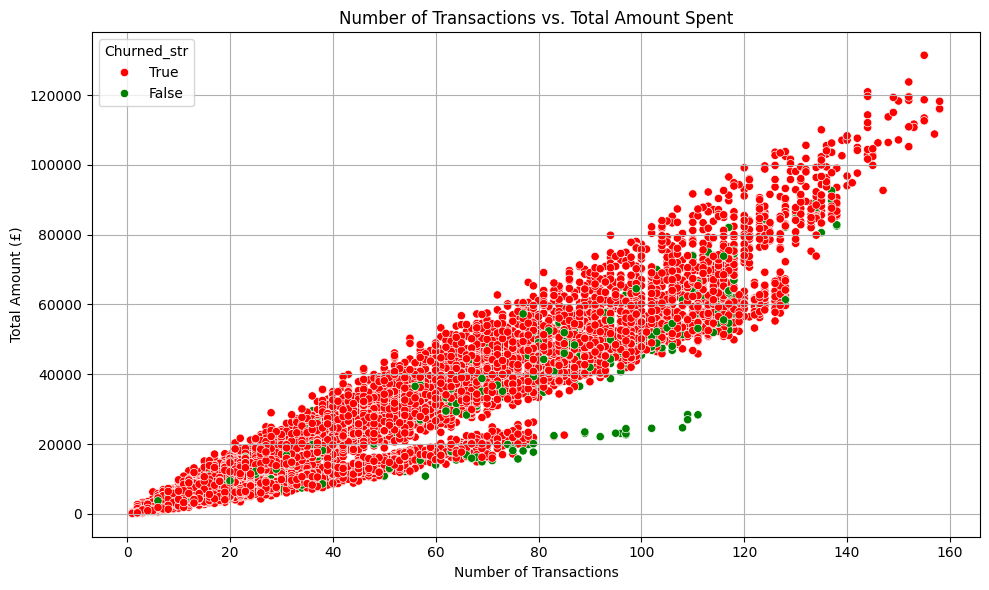

In [ ]:
# Plot: Number of Transactions vs. Total Amount Spent (colored by churn)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=recent_customers, x='Num_Transactions', y='Total_Amount', hue='Churned_str', palette={'True': 'red', 'False': 'green'})
plt.title('Number of Transactions vs. Total Amount Spent')
plt.xlabel('Number of Transactions')
plt.ylabel('Total Amount (£)')
plt.grid(True)
plt.tight_layout()
plt.show()

**Transaction Amount Range**

<ipython-input-6-0da57d584c34>:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_churned.groupby(['Churned_str', 'Amount_Range'])



Proportion of Transactions by Amount Range and Churn Status:

Churned_str   Churned  Retained
Amount_Range                   
< £100          0.085     0.098
£100–£499       0.385     0.430
£500–£999       0.406     0.416
£1,000+         0.124     0.057


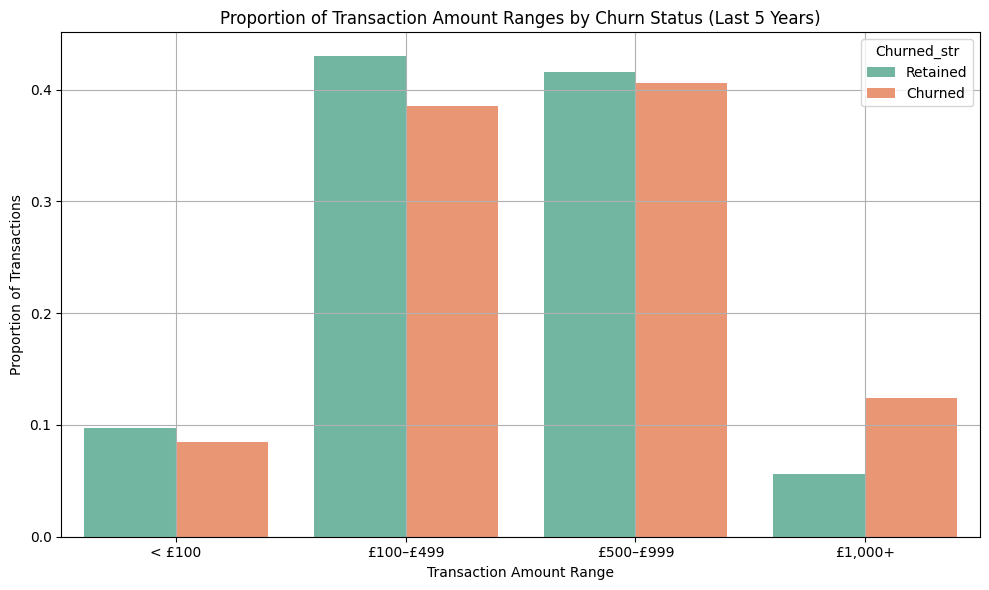

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_excel("Sample_Data _Growth_Analytics.xlsx", sheet_name="Sample Data", parse_dates=["Transaction_Date"])

# Step 1: Prepare churn info
max_date = df['Transaction_Date'].max()
cutoff_date = max_date - pd.DateOffset(years=5)
churn_threshold = max_date - pd.Timedelta(days=90)

# Create customer summary
customer_summary = df.groupby('Customer_ID').agg(
    Last_Transaction=('Transaction_Date', 'max')
).reset_index()

customer_summary = customer_summary[customer_summary['Last_Transaction'] >= cutoff_date]
customer_summary['Churned'] = customer_summary['Last_Transaction'] < churn_threshold

# Merge churn status into original transactions
df_churned = df.merge(customer_summary[['Customer_ID', 'Churned']], on='Customer_ID', how='inner')
df_churned['Churned_str'] = df_churned['Churned'].astype(str)

# Step 2: Define custom amount ranges
bins_custom = [0, 100, 500, 1000, float('inf')]
labels_custom = ['< £100', '£100–£499', '£500–£999', '£1,000+']
df_churned['Amount_Range'] = pd.cut(df_churned['Amount'], bins=bins_custom, labels=labels_custom, right=False)

# Step 3: Create summary table
summary_table = (
    df_churned.groupby(['Churned_str', 'Amount_Range'])
    .size()
    .reset_index(name='Transaction_Count')
)

summary_table['Total'] = summary_table.groupby('Churned_str')['Transaction_Count'].transform('sum')
summary_table['Proportion'] = summary_table['Transaction_Count'] / summary_table['Total']
summary_table['Churned_str'] = summary_table['Churned_str'].map({'True': 'Churned', 'False': 'Retained'})

# Step 4: Pivot summary table
summary_pivot = summary_table.pivot(index='Amount_Range', columns='Churned_str', values='Proportion').fillna(0).round(3)
print("\nProportion of Transactions by Amount Range and Churn Status:\n")
print(summary_pivot)

# Step 5: Plot grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=summary_table, x='Amount_Range', y='Proportion', hue='Churned_str', palette='Set2')

plt.title("Proportion of Transaction Amount Ranges by Churn Status (Last 5 Years)")
plt.xlabel("Transaction Amount Range")
plt.ylabel("Proportion of Transactions")
plt.grid(True)
plt.tight_layout()
plt.show()


**Industry Patterns**

Average Customer Lifetime by Industry (Descending):
        Industry  Customer_Lifetime_Days
0     Technology              504.990584
1     Consulting              493.917891
2         Retail              493.216964
3          Other              407.989238
4     Healthcare              397.265580
5        Finance              349.595784
6    Sole Trader              342.799123
7  Manufacturing              266.290598
8         Crypto              259.188073


<ipython-input-13-31782e3e7a83>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


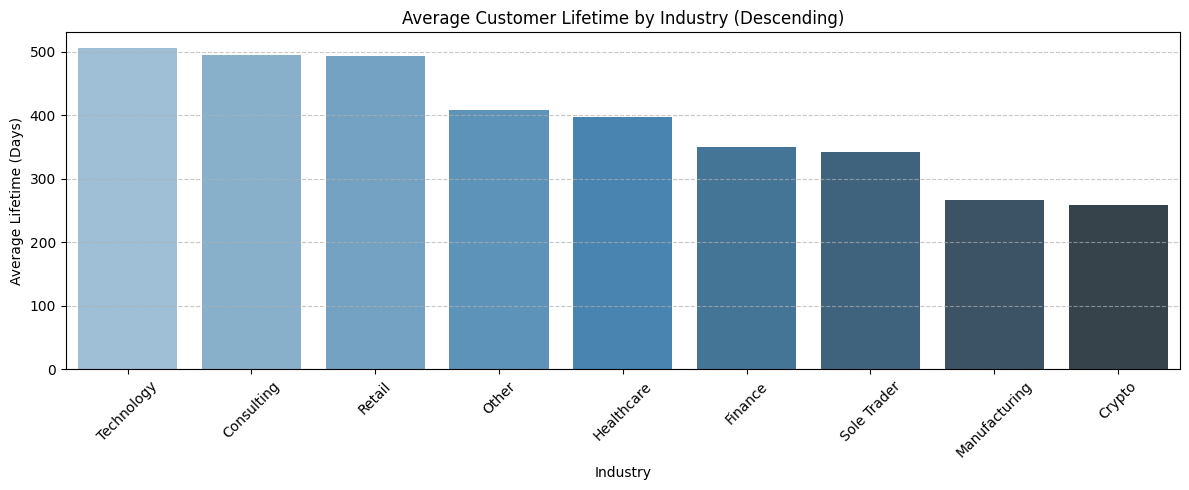

Churn Rate by Industry (Descending):
        Industry  Churn_Rate
0        Finance    1.000000
1    Sole Trader    1.000000
2     Healthcare    1.000000
3          Other    1.000000
4     Consulting    0.940363
5         Retail    0.930357
6     Technology    0.930320
7  Manufacturing    0.841026
8         Crypto    0.730275


<ipython-input-13-31782e3e7a83>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


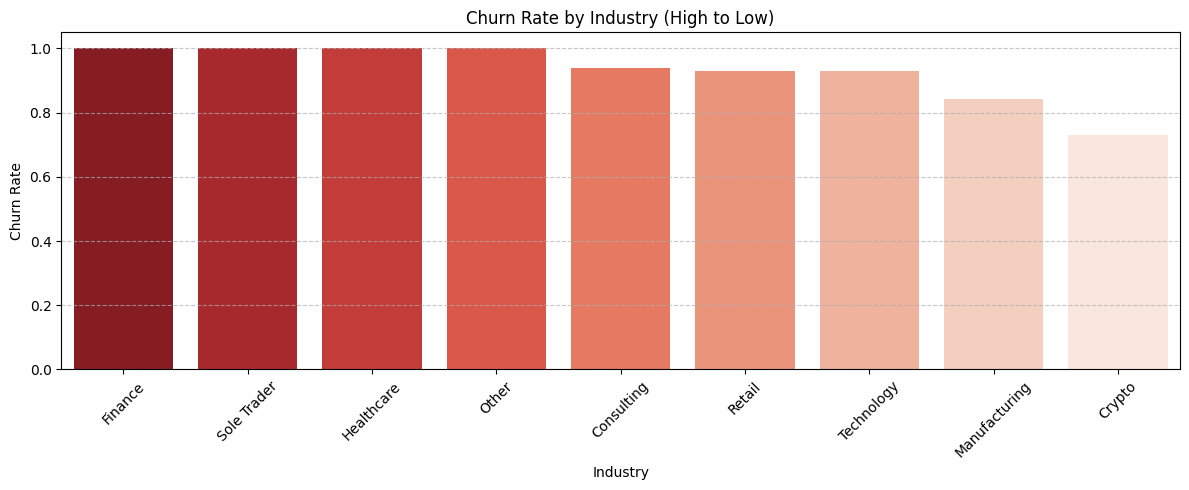

In [ ]:
# ---- Average Customer Lifetime by Industry ----
avg_lifetime_by_industry = (
    recent_customers.groupby('Industry')['Customer_Lifetime_Days']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# ---- Churn Rate by Industry ----
churn_rate_by_industry = (
    recent_customers.groupby('Industry')['Churned']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={'Churned': 'Churn_Rate'})
)

# Display table
print("Average Customer Lifetime by Industry (Descending):")
print(avg_lifetime_by_industry)

# ---- Plot: Average Lifetime by Industry ----
plt.figure(figsize=(12, 5))
sns.barplot(
    data=avg_lifetime_by_industry,
    x='Industry',
    y='Customer_Lifetime_Days',
    palette='Blues_d'
)
plt.title("Average Customer Lifetime by Industry (Descending)")
plt.ylabel("Average Lifetime (Days)")
plt.xlabel("Industry")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Display table
print("Churn Rate by Industry (Descending):")
print(churn_rate_by_industry)

# ---- Plot: Churn Rate by Industry ----
plt.figure(figsize=(12, 5))
sns.barplot(
    data=churn_rate_by_industry,
    x='Industry',
    y='Churn_Rate',
    palette='Reds_r'
)
plt.title("Churn Rate by Industry (High to Low)")
plt.ylabel("Churn Rate")
plt.xlabel("Industry")
plt.ylim(0, 1.05)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-22-127949b08f00>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=recent_customers, x='Industry', y='Total_Amount', estimator=sum, ci=None, palette='viridis')
<ipython-input-22-127949b08f00>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=recent_customers, x='Industry', y='Total_Amount', estimator=sum, ci=None, palette='viridis')


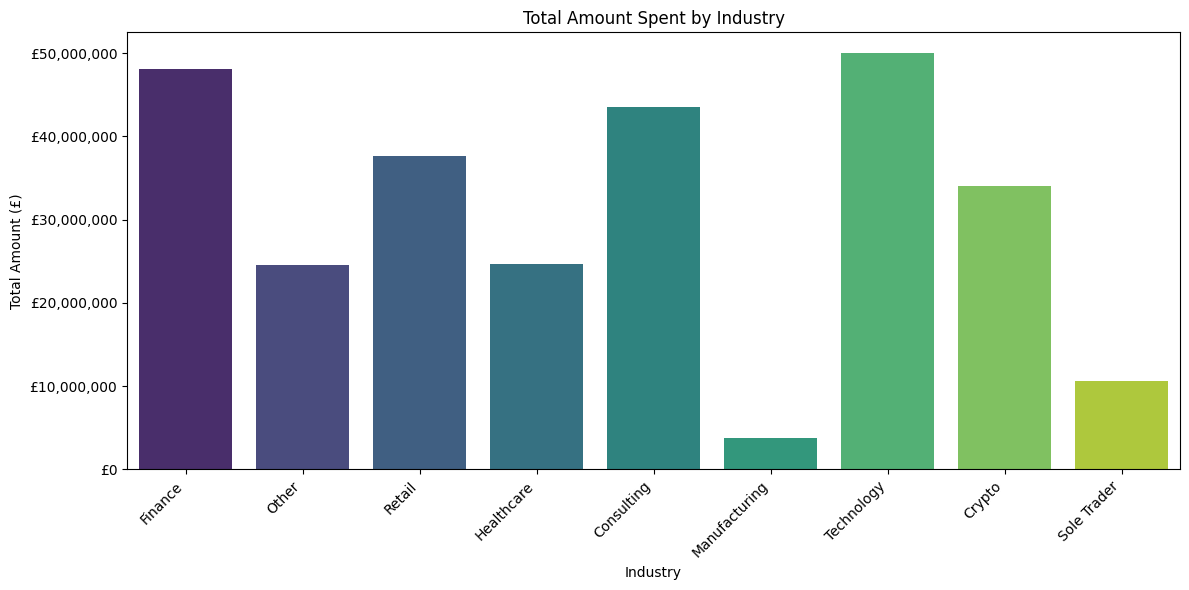

In [ ]:
import matplotlib.ticker as mticker

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=recent_customers, x='Industry', y='Total_Amount', estimator=sum, ci=None, palette='viridis')

plt.title('Total Amount Spent by Industry')
plt.xlabel('Industry')
plt.ylabel('Total Amount (£)')

plt.xticks(rotation=45, ha='right')

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'£{x:,.0f}'))

plt.tight_layout()
plt.show()


In [ ]:
# Calculate average Life Time value(LTV) by industry
avg_ltv_by_industry = recent_customers.groupby('Industry')['Total_Amount'].mean().reset_index()
avg_ltv_by_industry = avg_ltv_by_industry.rename(columns={'Total_Amount': 'Avg_LTV'})

# Display the table
print("\nAverage LTV by Industry:\n")
print(avg_ltv_by_industry)

# Summary table of LTV stats
ltv_summary = recent_customers.groupby('Industry')['Total_Amount'].agg(
    count='count',
    mean='mean',
    median='median',
    max='max',
    min='min',
    std='std',
    sum='sum'
).reset_index()

print("\nLTV Summary Statistics by Industry:\n")
ltv_summary



Average LTV by Industry:

        Industry       Avg_LTV
0     Consulting  37657.874230
1         Crypto  31245.627917
2        Finance  44124.009487
3     Healthcare  23630.822002
4  Manufacturing   6566.900573
5          Other  22043.938637
6         Retail  33614.396759
7    Sole Trader   9287.024495
8     Technology  47080.505872

LTV Summary Statistics by Industry:



,Industry,count,mean,median,max,min,std,sum
0,Consulting,1157,37657.874230,38977.944,79691.160,1760.244,20117.552552,4.357016e+07
1,Crypto,1090,31245.627917,31627.485,66123.240,526.770,16491.780010,3.405773e+07
2,Finance,1091,44124.009487,38856.495,131391.765,790.575,29289.546004,4.813929e+07
3,Healthcare,1043,23630.822002,22254.816,59721.576,573.648,13808.069319,2.464695e+07
4,Manufacturing,585,6566.900573,4861.630,28442.645,6.950,5924.987038,3.841637e+06
5,Other,1115,22043.938637,20688.940,54650.740,683.780,12778.582871,2.457899e+07
6,Retail,1120,33614.396759,34160.235,69239.830,1803.080,17960.352114,3.764812e+07
7,Sole Trader,1140,9287.024495,8207.520,26277.816,225.744,6040.887327,1.058721e+07
8,Technology,1062,47080.505872,47746.270,99023.184,1849.822,24889.535070,4.999950e+07
